## Indian Premier League 2008-2019
### Ball-by-ball Indian Premier League (IPL) cricket dataset

## Context
Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008.

### Inspiration
Draw analysis, player/team performance, apply and learn statistical methods on real data

## Data Preparation 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
print('modules are imported')
pd.set_option('display.max_columns', 500)


modules are imported


### Reading the data 

In [2]:
ipl = pd.read_csv('matches.csv')

In [3]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
ipl.shape

(756, 18)

In [34]:
ipl.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


### Data Cleaning and Processing


In [7]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
# we wont use umpire* cols in our analysis let drop them 

ipl = ipl.drop(columns = ['umpire1','umpire2','umpire3'], axis = 1 )

In [9]:
#check 
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [10]:
# lets see what seasons do we have in our dataframe 
ipl.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [11]:
# lets see all the teams 
ipl.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
ipl.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [13]:
# change values  with 'Rising Pune Supergiant', 'Pune Warriors' & 'Rising Pune Supergiants' to  Rising Pune Supergiant in team1
# team2 , winner and toss_winner cols 


In [14]:
names_cols = ['team1','team2', 'toss_winner','winner']
for col in names_cols:
    ipl[col].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 
                        'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'}
                      ,inplace = True)

In [15]:
#check 
ipl.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [16]:
# change Bangalore value in col city to Bengaluru
ipl.city.replace({'Bangalore' : 'Bengaluru'},inplace=True)

In [17]:
#check
ipl.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [18]:
# lets check for missing values 
ipl.isna().sum().sum()

15

In [19]:
# lets filter NaN values 
nan_df = ipl[ipl.isna().any(axis = 1)]

In [20]:
nan_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,546,2015,Bengaluru,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bengaluru,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium


In [21]:
#  'City' Column has NaN values for Rows where Stadium Location is dubai. So we will Replace These NaN values and Insert "Dubai" as City in its Place

#ipl['city'].isna().sum() we have 7 NaN values 

ipl['city'].fillna('Dubai',inplace = True )

# ipl_df.loc[[461,462,466,468,469,474,476],'city'] = "Dubai"
# as We Can See this values are at index 461,462,466,468,469,474,476


In [22]:
# check 
ipl.city.isnull().any()


False

In [23]:
# Lets Check if any  other COlS Have NaN values
ipl.isna().any()[lambda x:x]


winner             True
player_of_match    True
dtype: bool

##  EDA and Visualization

In [24]:
# let see how many matches are played 
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [25]:
ipl.result.count()

756

We can see 756 Matches have been played in 11 Seasons (08 - 19)



In [26]:
ipl.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [27]:
# let filter matches have results no tie 
normal_matches = ipl[ipl['result'] == 'normal'].count()
normal_matches.result

743

we can see out of 756 matches only 13 matches seems have abnormal results 

In [28]:
# let see cities where maches have been played 
ipl.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

### how many matches have played in each city ? 


In [29]:
cities = ipl.groupby('city')[['id']].count()    
cities.rename(columns={'id':'matches'}, inplace = True)
cities = cities.sort_values(by='matches', ascending = False).reset_index()

cities

,city,matches
0,Mumbai,101
1,Bengaluru,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


there are 32 locations where matches have been played

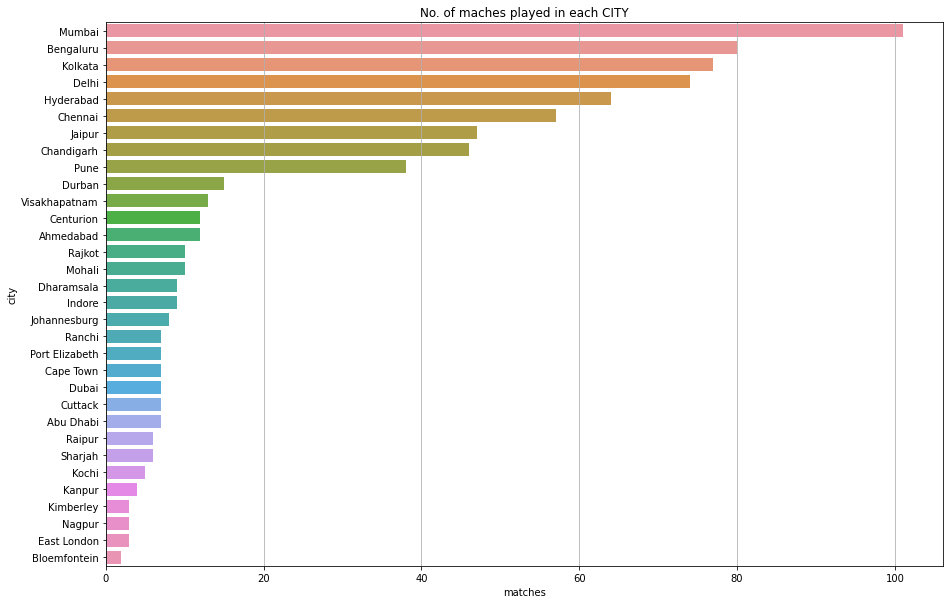

In [30]:
# lets plot this 
plt.figure(figsize=(15,10))
plt.grid()
plt.title('No. of maches played in each CITY')
sns.barplot(x='matches', y='city', data=cities)
plt.show()

it seems that Mumbai , Kalkota and bangaluru are the most 3 favorite places to held matches 

### how many matches every team won ?

In [31]:

ipl.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', nan], dtype=object)

In [32]:
teams = ipl.groupby('winner')[['id']].count()
teams = teams.sort_values(by='id',ascending = False).reset_index()
teams.rename(columns={'winner':'team','id':'wins'}, inplace=True)
teams

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


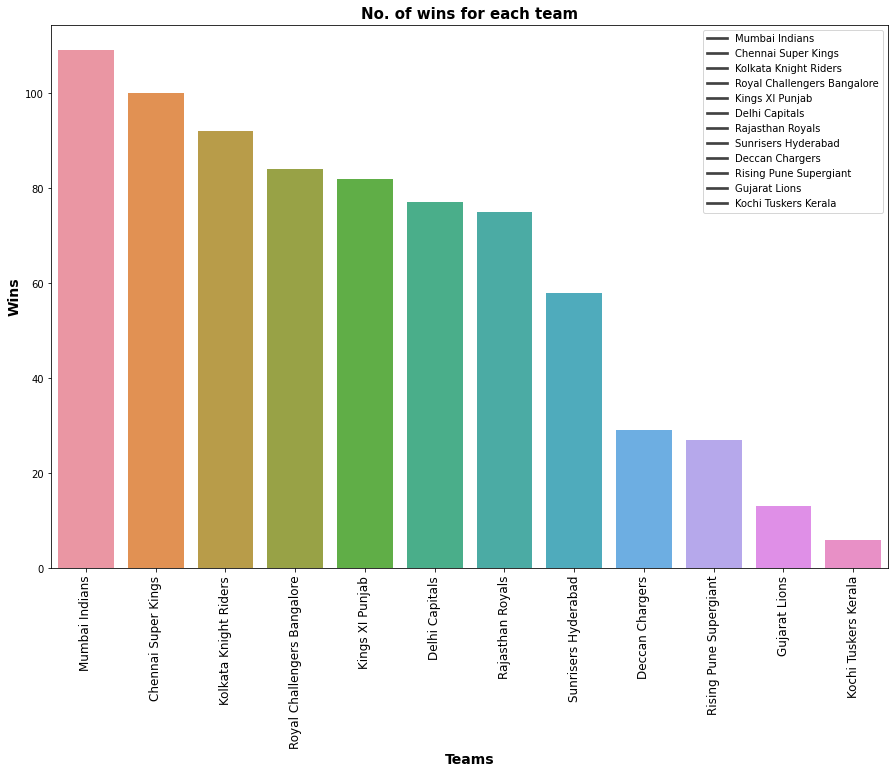

In [76]:
# lets plot this 

plt.figure(figsize=(15,10))
#plt.grid()
sns.barplot(x='team', y='wins', data=teams)
plt.title('No. of wins for each team',fontweight='bold',fontsize=15)
plt.xlabel('Teams',fontweight='bold',fontsize=14)
plt.ylabel('Wins',fontweight='bold',fontsize=14)
plt.legend(teams.team,loc=1)
plt.xticks(rotation = 'vertical', size = 12)
plt.show()

 Mumbai indians is the hero of IPL followed by Chennai Super Kings and Kolkata Knight Riders

### what season with most number of matches ?


In [40]:
seasons = ipl.groupby('season')[['id']].count()
seasons = seasons.sort_values(by='season', ascending=False).reset_index()
seasons.rename(columns={'season':'Year','id':'matches'}, inplace = True)

seasons

,Year,matches
0,2019,60
1,2018,60
2,2017,59
3,2016,60
4,2015,59
5,2014,60
6,2013,76
7,2012,74
8,2011,73
9,2010,60


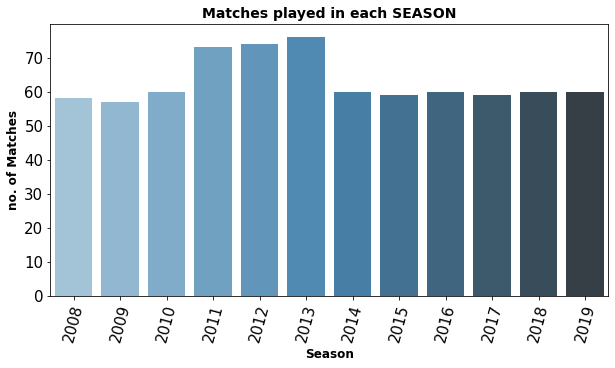

In [68]:
# lets plot this 
plt.figure(figsize=(10,5))
sns.barplot(x='Year' , y='matches', data=seasons, palette="Blues_d")
plt.xticks(rotation = '75')
plt.tick_params(labelsize = 15)
plt.xlabel('Season', fontsize = 12 , fontweight='bold')
plt.ylabel('no. of Matches', fontsize = 12 , fontweight='bold')
plt.title('Matches played in each SEASON', fontsize = 14 , fontweight='bold')
plt.show()

from season 2011 to season 2013 we had the most no. of matches played 

###  What was the most preferred Decision On winning Toss ?


In [52]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [55]:
ipl.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [58]:
decisions = ipl.groupby('toss_decision')[['id']].count()
decisions = decisions.sort_values(by='id', ascending=False).reset_index()
decisions.rename(columns={'id':'Total'}, inplace = True)


decisions

,toss_decision,Total
0,field,463
1,bat,293


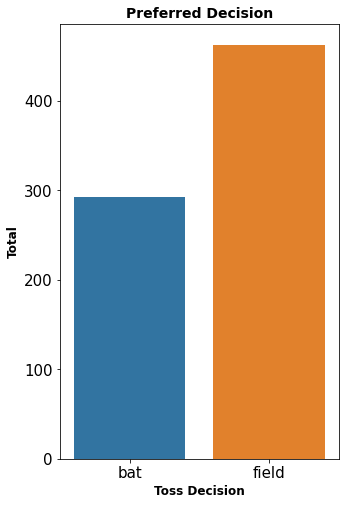

In [71]:
# lets plot this 
plt.figure(figsize=(5,8))
sns.barplot(x='toss_decision' , y='Total', data=decisions, order=['bat','field'])
plt.tick_params(labelsize = 15)
plt.xlabel('Toss Decision', fontsize = 12 , fontweight='bold')
plt.ylabel('Total', fontsize = 12 , fontweight='bold')
plt.title('Preferred Decision', fontsize = 14 , fontweight='bold')
plt.show()

the most preferred decision was __field__

### Which Decision has proved most beneficial (bat-field)?

In [99]:
# lets see actual team winner and toss_winner 
ipl[['toss_winner','winner']].head()

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore


In [97]:
bat_wins = ipl.loc[(ipl['toss_winner'] == ipl['winner']) &
                   (ipl['toss_decision'] == 'bat'),['id','winner','toss_winner', 'toss_decision']]
bat_wins.head()


,id,winner,toss_winner,toss_decision
4,5,Royal Challengers Bangalore,Royal Challengers Bangalore,bat
14,15,Delhi Capitals,Delhi Capitals,bat
20,21,Sunrisers Hyderabad,Sunrisers Hyderabad,bat
50,51,Delhi Capitals,Delhi Capitals,bat
54,55,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


In [96]:
field_wins = ipl.loc[(ipl['toss_winner'] == ipl['winner']) & 
                     (ipl['toss_decision'] == 'field'),['id','winner','toss_winner','toss_decision']]
field_wins.head()

,id,winner,toss_winner,toss_decision
1,2,Rising Pune Supergiant,Rising Pune Supergiant,field
2,3,Kolkata Knight Riders,Kolkata Knight Riders,field
3,4,Kings XI Punjab,Kings XI Punjab,field
5,6,Sunrisers Hyderabad,Sunrisers Hyderabad,field
6,7,Mumbai Indians,Mumbai Indians,field


In [101]:
# lets count both wins at matches and bat and field decision s
bat_wins['id'].count()

134

In [102]:
field_wins['id'].count()

259

In [105]:
wins_all = [bat_wins, field_wins]
wins_df = pd.concat(wins_all)
wins_df.shape

(393, 4)

In [120]:
wins = wins_df.groupby('toss_decision')[['id']].count()
wins = wins.reset_index()
wins.rename(columns={'id':'Total'}, inplace =True)
wins

,toss_decision,Total
0,bat,134
1,field,259


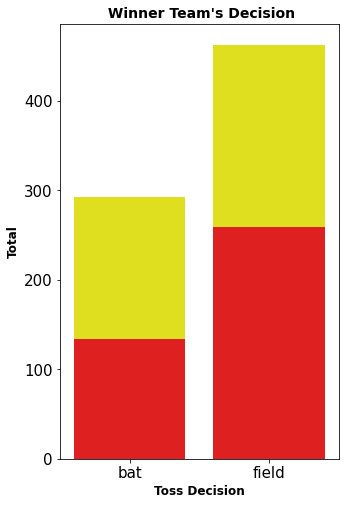

In [133]:
# lets plot 
plt.figure(figsize=(5,8))
sns.barplot(x='toss_decision' , y='Total', data=decisions, order=['bat','field'],
           color='yellow')
sns.barplot(x='toss_decision' , y='Total', data=wins, order=['bat','field'],
           color='red')
plt.tick_params(labelsize = 15)
plt.xlabel('Toss Decision', fontsize = 12 , fontweight='bold')
plt.ylabel('Total', fontsize = 12 , fontweight='bold')
plt.title(' Winner Team\'s Decision', fontsize = 14 , fontweight='bold')
plt.show()

### Which Venue has hosted the Most Number Of Matches ?



In [132]:
len(ipl.venue.unique())

41

In [138]:
venues = ipl.groupby('venue')[['id']].count()
venues = venues.sort_values('id', ascending = False).reset_index()
venues.rename(columns={'venue':'Stadium', 'id':'Matches'}, inplace = True )
venues

,Stadium,Matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


Text(0.5, 1.0, 'Venues')

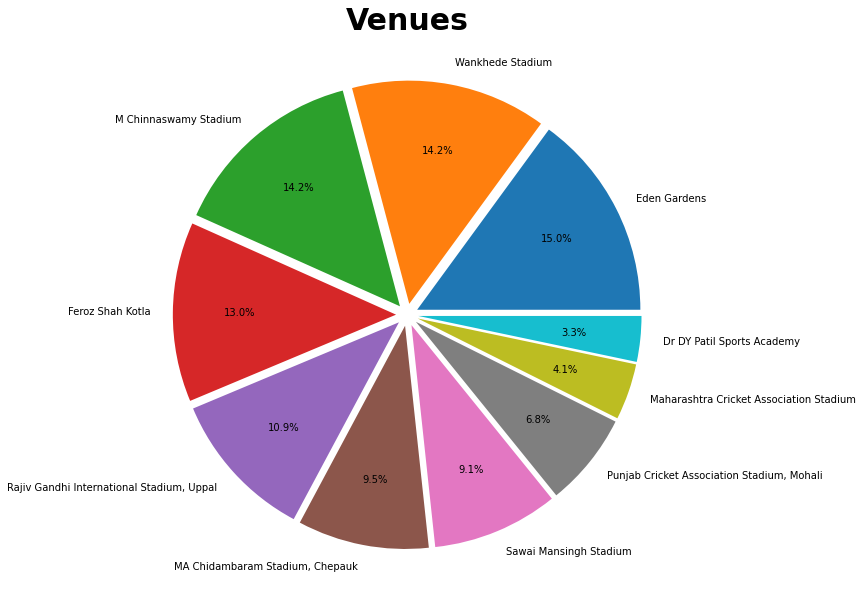

In [176]:
plt.figure(figsize=(10,15))
labels = venues.Stadium[0:10]
plt.tick_params(labelsize=40)
plt.pie(x=venues.Matches[0:10], autopct="%.1f%%", explode=[0.05]*10, labels=labels, pctdistance=0.7)
plt.title("Venues",fontweight='bold',fontsize=30)
#pie.savefig("DeliveryPieChart.png")

Eden Gardens is the most were matches were played

### Who has been awarded with Player Of the Match maximum Number Of Times ?
